For each of the next activities, create a new code cell and write your solution.
For these activities you will need the file data_lecture3.xlsx, which contains 8 different sheets:data1,
data2, …, data8.

1. Open the file file data_session_3.xlsx and load the data for sheets data1, … to data8
in pandas dataframes called df1, df2, … df8.

In [2]:
import pandas as pd

In [14]:
import pandas as pd

# Open the Excel file and load data into pandas dataframes
xls = pd.ExcelFile('data_session_3.xlsx')

# Load each sheet into a separate dataframe
dfs = {f'df{i+1}': pd.read_excel(xls, sheet_name=f'data{i+1}') for i in range(8)}


print(dfs['df2'].head())  # Print the first few rows of df2

   Values
0       9
1       0
2       8
3       0
4       0


In [15]:
# Assuming you already have loaded the data into dataframes df1, df2, ..., df8

for i in range(1, 9):
    sheet_name = f'df{i}'
    print(f"Data type analysis for {sheet_name}:")
    df = dfs[sheet_name]
    
    # Check if there are any non-numeric columns
    non_numeric_columns = df.select_dtypes(exclude=['number']).columns.tolist()
    
    if len(non_numeric_columns) > 0:
        print("Categorical Data:", non_numeric_columns)
    
    # Check if there are any columns with non-integer values
    non_integer_columns = [col for col in df.columns if not df[col].dtype.kind in 'iu']
    
    if len(non_integer_columns) > 0:
        print("Continuous Data:", non_integer_columns)
    else:
        print("Discrete Data: All columns are integers.")
    
    print()


Data type analysis for df1:
Continuous Data: ['Values']

Data type analysis for df2:
Discrete Data: All columns are integers.

Data type analysis for df3:
Categorical Data: ['Values']
Continuous Data: ['Values']

Data type analysis for df4:
Categorical Data: ['Values']
Continuous Data: ['Values']

Data type analysis for df5:
Continuous Data: ['Values']

Data type analysis for df6:
Discrete Data: All columns are integers.

Data type analysis for df7:
Continuous Data: ['X', 'Y', 'Z']

Data type analysis for df8:
Continuous Data: ['X', 'Y']



User
3. Using Python, make a frequency distribution for the data in sheet data3.

In [20]:
df3 = dfs['df3']

In [23]:
# Assuming you already have loaded the data into dataframe df3

# Assuming df3 is already loaded from data3 sheet
# Replace 'column_name' with the name of the column for which you want to create the frequency distribution

frequency_distribution = df3['Values'].value_counts()

# Print the frequency distribution
print("Frequency Distribution:")
print(frequency_distribution)


Frequency Distribution:
Values
Medium       37
Low          23
High         20
Very_Low     19
Very_High     1
Name: count, dtype: int64


4. Plot a histogram for the data in sheet data5.

In [27]:
df5 = dfs['df5']

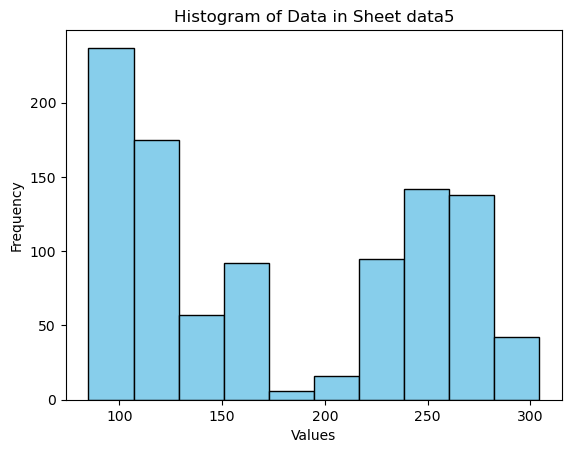

In [28]:


import matplotlib.pyplot as plt


plt.hist(df5['Values'], bins=10, color='skyblue', edgecolor='black')

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Data in Sheet data5')

plt.show()


5. Using numpy, compute the mean, median, variance and standard deviation for data in
sheet data2.

In [29]:
df2 = dfs['df2']

In [31]:
import numpy as np
import pandas as pd

# Load the data into a pandas DataFrame
df2 = pd.read_excel('data_session_3.xlsx', sheet_name='data2')


data_column = df2['Values']

# Compute the mean, median, variance, and standard deviation using numpy
mean_value = np.mean(data_column)
median_value = np.median(data_column)
variance_value = np.var(data_column)
std_deviation_value = np.std(data_column)

# Print the computed statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Variance:", variance_value)
print("Standard Deviation:", std_deviation_value)


Mean: 4.25
Median: 4.5
Variance: 10.3275
Standard Deviation: 3.213642792844283


6. Make a scatterplot of the variables Y and Z, in the sheet data7.

In [32]:
df7 = dfs['df7']

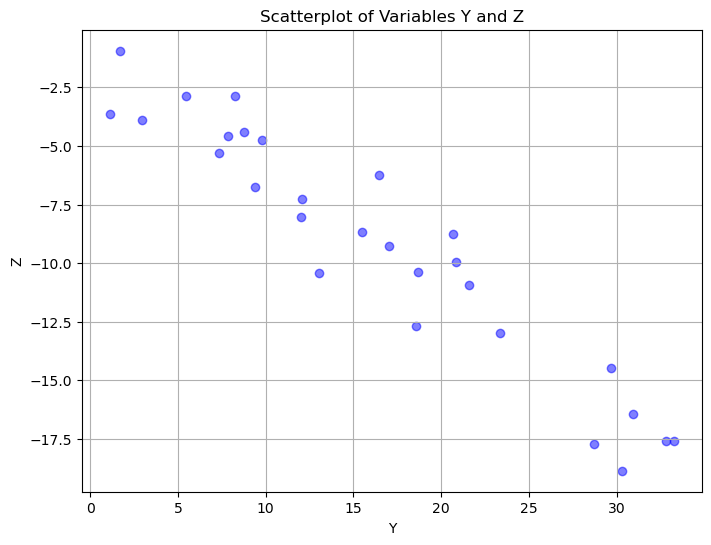

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data into a pandas DataFrame
df7 = pd.read_excel('data_session_3.xlsx', sheet_name='data7')


# Extract the variables Y and Z
Y = df7['Y']
Z = df7['Z']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(Y, Z, color='blue', alpha=0.5)

# Add labels and title
plt.xlabel('Y')
plt.ylabel('Z')
plt.title('Scatterplot of Variables Y and Z')

# Show plot
plt.grid(True)
plt.show()


7. Compute the correlation and the covariance for the pairs of variables X-Y; X-Z and Y-Z
on the same dataset.

In [34]:
import pandas as pd

# Load the data into a pandas DataFrame
df7 = pd.read_excel('data_session_3.xlsx', sheet_name='data7')



# Extract the variables X, Y, and Z
X = df7['X']
Y = df7['Y']
Z = df7['Z']

# Compute correlation
correlation_XY = X.corr(Y)
correlation_XZ = X.corr(Z)
correlation_YZ = Y.corr(Z)

# Compute covariance
covariance_XY = X.cov(Y)
covariance_XZ = X.cov(Z)
covariance_YZ = Y.cov(Z)

# Print the computed statistics
print("Correlation X-Y:", correlation_XY)
print("Correlation X-Z:", correlation_XZ)
print("Correlation Y-Z:", correlation_YZ)

print("\nCovariance X-Y:", covariance_XY)
print("Covariance X-Z:", covariance_XZ)
print("Covariance Y-Z:", covariance_YZ)


Correlation X-Y: 0.9638715983138969
Correlation X-Z: -0.9743360582131338
Correlation Y-Z: -0.9541000517611214

Covariance X-Y: 29.580827333822718
Covariance X-Z: -15.868809974704318
Covariance Y-Z: -48.45015097462595


8. Consider the data in sheet data8. Are the variables X and Y correlated? Are they independent?

In [35]:
df8 = dfs['df8']

In [36]:
import pandas as pd

# Load the data into a pandas DataFrame
df8 = pd.read_excel('data_session_3.xlsx', sheet_name='data8')

# Extract the variables X and Y
X = df8['X']
Y = df8['Y']

# Compute correlation coefficient
correlation = X.corr(Y)

# Here, I'll use the Chi-square test for independence from scipy
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(X, Y)

# Perform the Chi-square test for independence
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print the results
print("Correlation coefficient between X and Y:", correlation)

# Check if the p-value is less than the significance level (e.g., 0.05) to reject the null hypothesis
if p_value < 0.05:
    print("The variables X and Y are dependent (not independent).")
else:
    print("The variables X and Y are independent.")


Correlation coefficient between X and Y: -0.019027707206914168
The variables X and Y are independent.


9. Compute the mean, median, variance and standard deviation for dataset (given a
frequency table) in sheet data6.

In [37]:
df6 = dfs['df6']

In [40]:
import numpy as np
import pandas as pd

# Load the data into a pandas DataFrame
df6 = pd.read_excel('data_session_3.xlsx', sheet_name='data6')

data = []
for index, row in df6.iterrows():
    data.extend([row['value']] * row['Frequency'])

# Compute the mean, median, variance, and standard deviation using numpy
mean_value = np.mean(data)
median_value = np.median(data)
variance_value = np.var(data)
std_deviation_value = np.std(data)

# Print the computed statistics
print("Mean:", mean_value)
print("Median:", median_value)
print("Variance:", variance_value)
print("Standard Deviation:", std_deviation_value)


Mean: 2.8282828282828283
Median: 3.0
Variance: 2.9503111927354357
Standard Deviation: 1.7176469930505034


10. Create a numpy array with raw data corresponding to the frequency table in data6. That is,
create a vector of raw data with ten 0’s, fifteen 1’s, and so on.

In [42]:
import numpy as np
import pandas as pd

# Load the data into a pandas DataFrame
df6 = pd.read_excel('data_session_3.xlsx', sheet_name='data6')


raw_data = []
for _, row in df6.iterrows():
    raw_data.extend([row['value']] * row['Frequency'])

# Convert the list to a NumPy array
raw_data_array = np.array(raw_data)

# Print the created NumPy array
print("NumPy array with raw data:")
print(raw_data_array)


NumPy array with raw data:
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6]


In [1]:
from scipy.stats import binom

def min_applications_for_interview_calls(p, k, target_probability):
    n = 1
    cumulative_probability = 0
    while cumulative_probability < target_probability:
        cumulative_probability = 1 - binom.cdf(k-1, n, p)
        if cumulative_probability >= target_probability:
            break
        n += 1
    return n

# Probability of getting an interview call for each application
p = 0.05

# Minimum number of interview calls desired
k = 10

# Target probability (e.g., 0.95 for 95% chance)
target_probability = 0.95

# Calculate the minimum number of applications needed
min_applications = min_applications_for_interview_calls(p, k, target_probability)
print("Minimum number of applications needed:", min_applications)


Minimum number of applications needed: 311
